In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

2023-05-03 19:19:21.318146: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-03 19:19:21.321306: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-03 19:19:21.366087: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-03 19:19:21.367114: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-03 19:19:22.279666: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
df = pd.read_csv("Tesla.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
df = df[["Date", "Close"]]
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
df.set_index("Date", inplace=True)
df.head()

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001


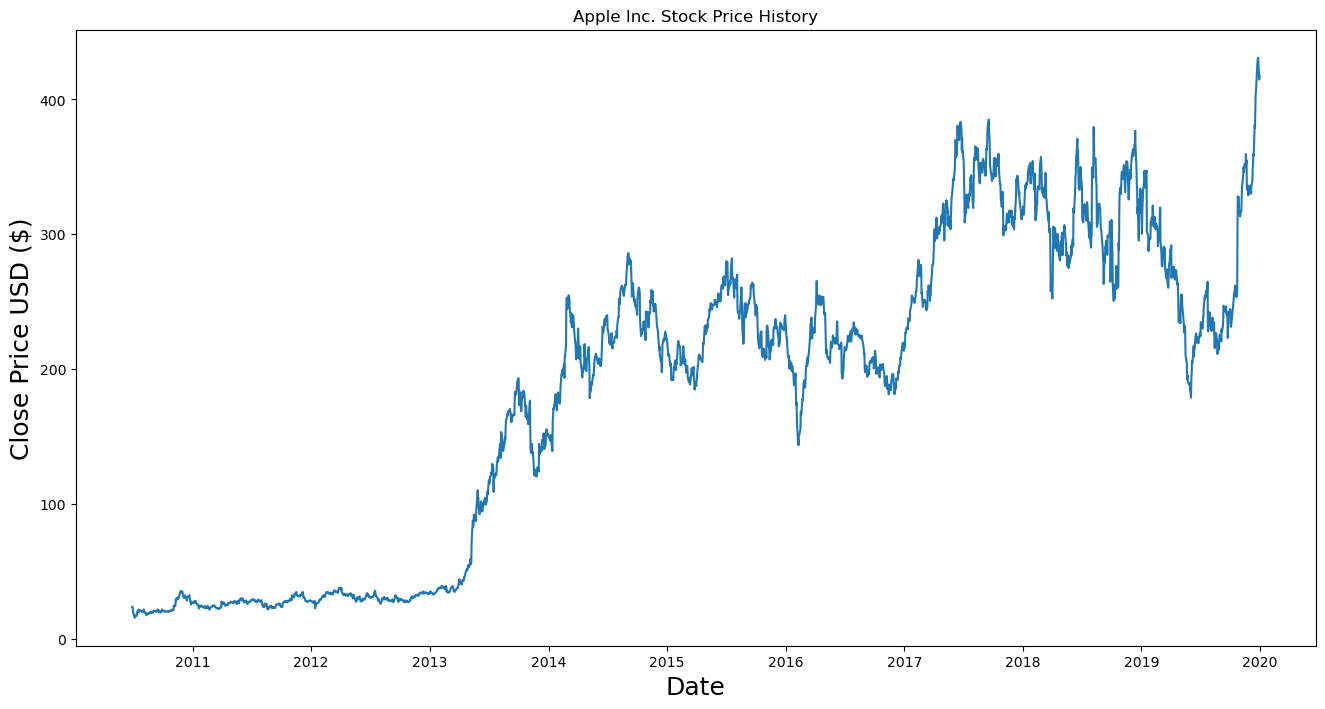

In [4]:
plt.figure(figsize=(16,8))
plt.title("Apple Inc. Stock Price History")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

In [5]:
train_data = df[:int(len(df)*0.8)]
test_data = df[int(len(df)*0.8):]
print(f"Training set shape: {train_data.shape}")
print(f"Testing set shape: {test_data.shape}")

Training set shape: (1915, 1)
Testing set shape: (479, 1)


In [6]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

In [7]:
def create_dataset(data, window_size):
    X = []
    y = []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y

window_size = 60
X_train, y_train = create_dataset(train_scaled, window_size)
X_test, y_test = create_dataset(test_scaled, window_size)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (1855, 60, 1)
Testing set shape: (419, 60, 1)


In [8]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(units=1))

2023-05-03 19:25:42.081950: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-03 19:25:42.082719: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-05-03 19:25:42.384879: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gra

In [9]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [10]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50


2023-05-03 19:26:38.174841: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-03 19:26:38.176497: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-03 19:26:38.178376: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

58/58 [==============================] - ETA: 0s - loss: 0.1105

2023-05-03 19:26:44.645766: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-03 19:26:44.647294: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-03 19:26:44.648352: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

58/58 [==============================] - 7s 69ms/step - loss: 0.1105 - val_loss: 0.1286
Epoch 2/50
58/58 [==============================] - 3s 48ms/step - loss: 0.0917 - val_loss: 0.1486
Epoch 3/50
58/58 [==============================] - 4s 62ms/step - loss: 0.0903 - val_loss: 0.1711
Epoch 4/50
58/58 [==============================] - 3s 44ms/step - loss: 0.0901 - val_loss: 0.1704
Epoch 5/50
58/58 [==============================] - 3s 45ms/step - loss: 0.0889 - val_loss: 0.1716
Epoch 6/50
58/58 [==============================] - 3s 47ms/step - loss: 0.0891 - val_loss: 0.1655
Epoch 7/50
58/58 [==============================] - 2s 40ms/step - loss: 0.0886 - val_loss: 0.1348
Epoch 8/50
58/58 [==============================] - 2s 29ms/step - loss: 0.0882 - val_loss: 0.1671
Epoch 9/50
58/58 [==============================] - 3s 54ms/step - loss: 0.0888 - val_loss: 0.1467
Epoch 10/50
58/58 [==============================] - 4s 72ms/step - loss: 0.0886 - val_loss: 0.1423
Epoch 11/50
58/58 [=

In [11]:
loss = model.evaluate(X_test, y_test)
print(f"Mean squared error: {loss}")

14/14 [==============================] - 0s 10ms/step - loss: 0.1342
Mean squared error: 0.1341923475265503


In [14]:
np.shape(X_test)

(419, 60, 1)

In [19]:
predicted_data=model.predict(X_test)

14/14 [==============================] - 0s 24ms/step


In [20]:
nsamples, nx, ny = predicted_data.shape
predicted_data_reshaped = predicted_data.reshape((nsamples,nx*ny))

In [21]:
predictions = scaler.inverse_transform(predicted_data_reshaped)
predictions

array([[157.97047, 165.6734 , 166.27357, ..., 165.1066 , 165.21344,
        165.2778 ],
       [158.17418, 165.3001 , 166.03186, ..., 165.21344, 165.27782,
        165.07005],
       [157.62396, 165.02869, 166.00822, ..., 165.27782, 165.07005,
        165.08456],
       ...,
       [156.28601, 163.35371, 164.07796, ..., 168.1953 , 168.398  ,
        168.56984],
       [156.098  , 163.25758, 164.13403, ..., 168.398  , 168.56984,
        168.64642],
       [156.0682 , 163.34303, 164.20874, ..., 168.56984, 168.64642,
        168.47888]], dtype=float32)

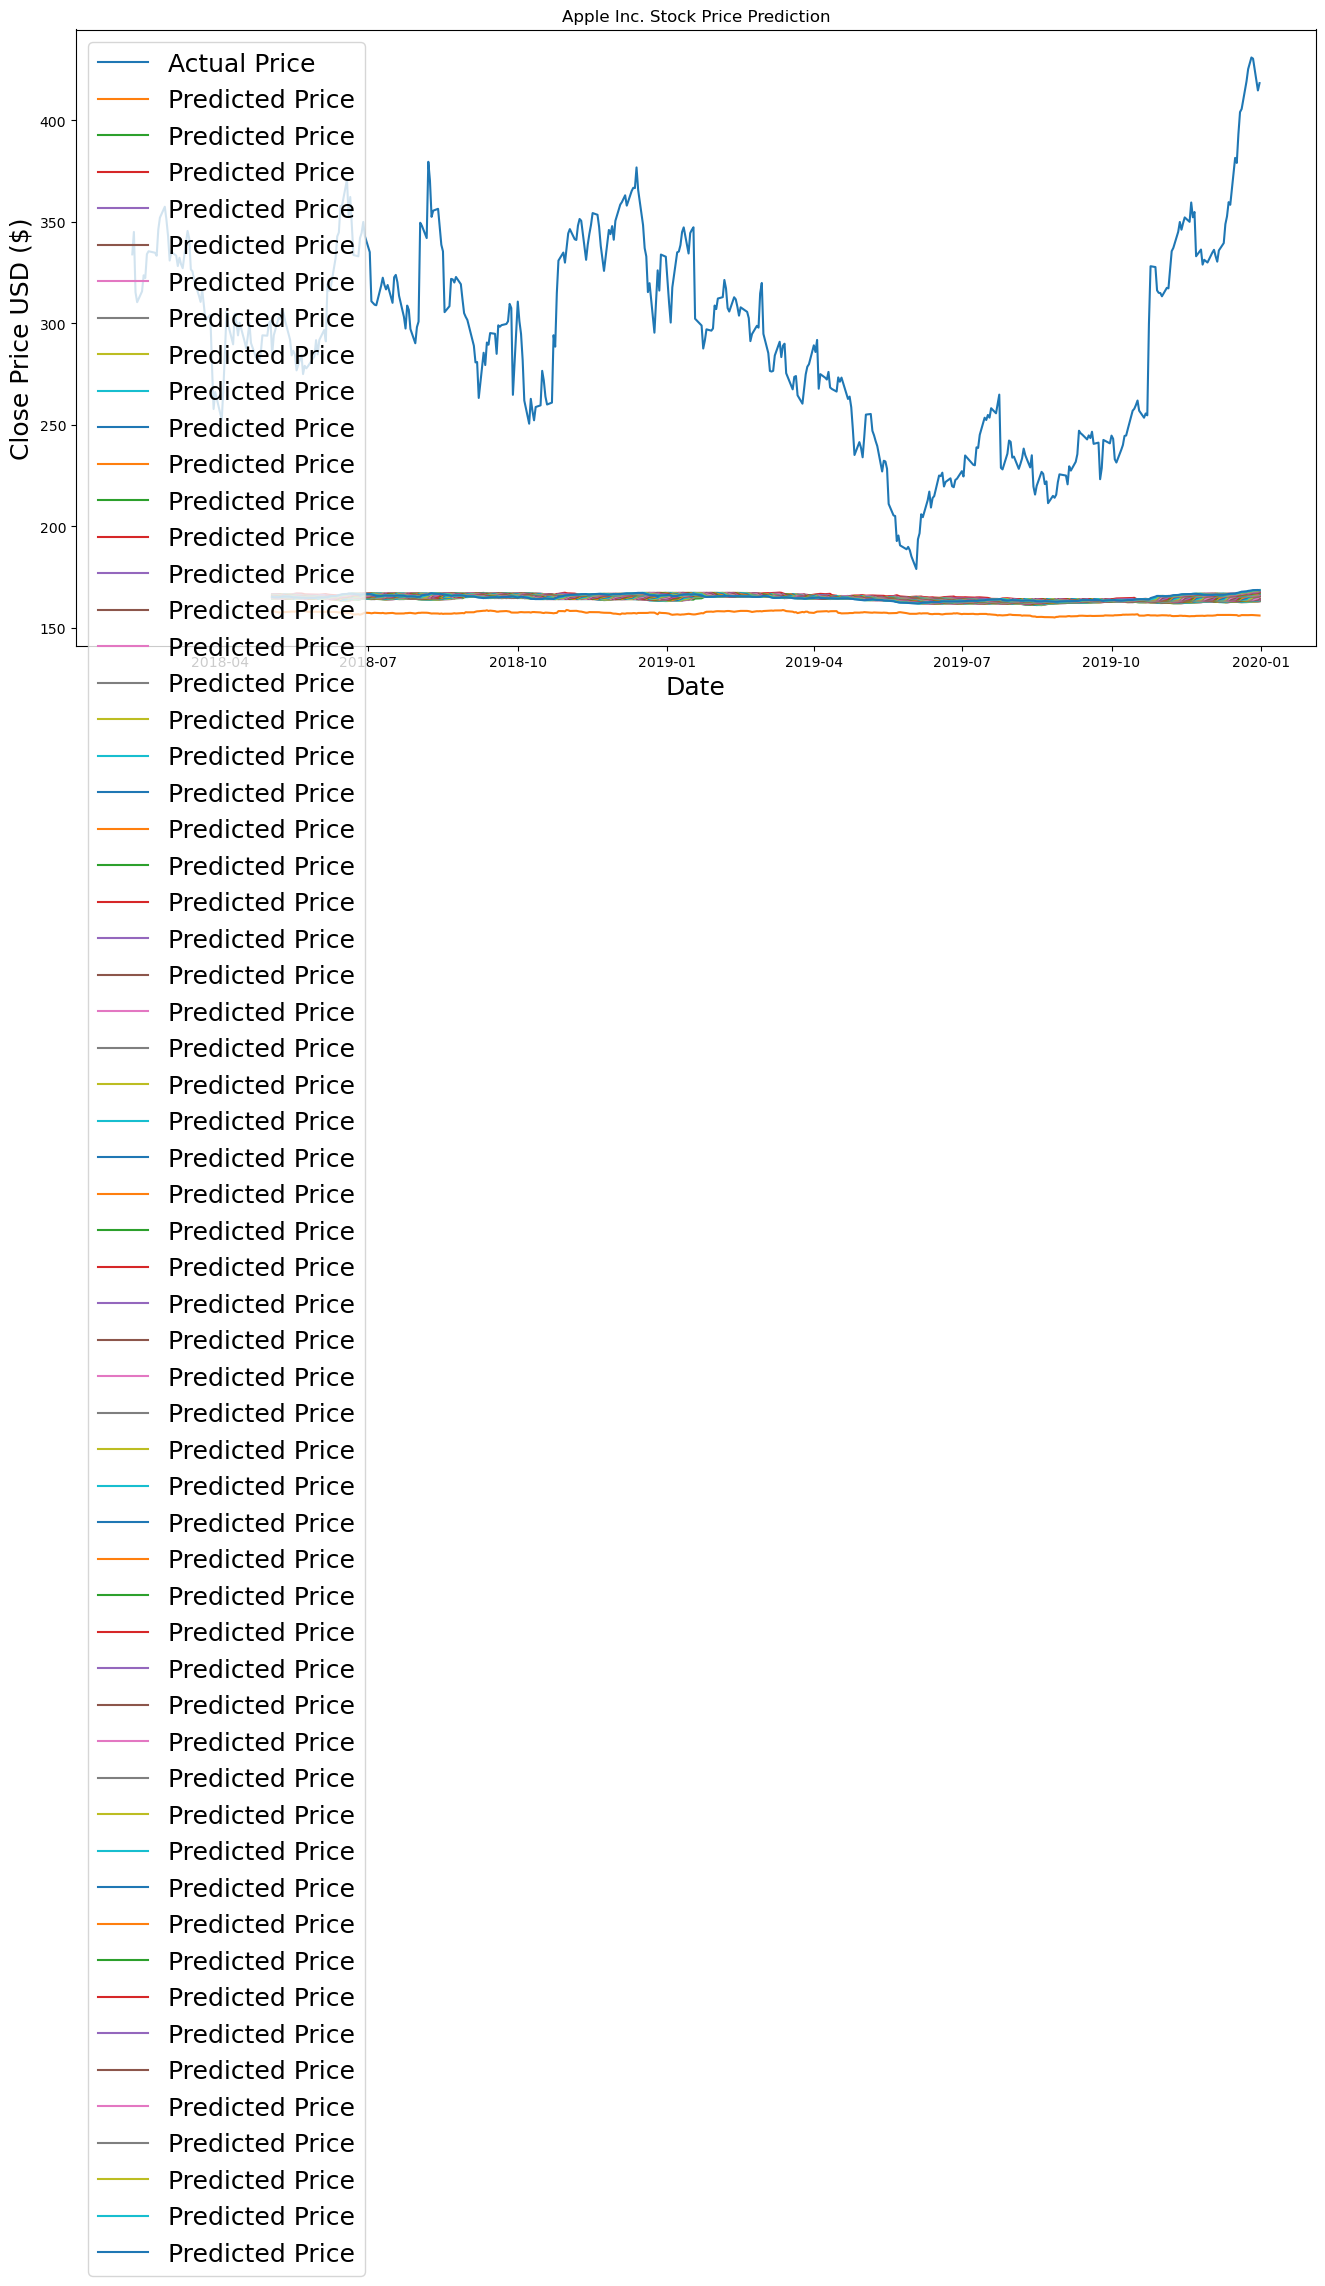

In [22]:
plt.figure(figsize=(16,8))
plt.title("Apple Inc. Stock Price Prediction")
plt.plot(test_data.index, test_data["Close"], label="Actual Price")
plt.plot(test_data.index[window_size:], predictions, label="Predicted Price")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.legend(fontsize=18)
plt.show()